## Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


Al igual que hicimos en el ejercicio de la ANOVA, vamos a utilizar el archivo que contiene la variable respuesta "normalizada" pero las variables predictoras sin estandarizar:

In [2]:
df = pd.read_csv('datos/wellness_5.csv', index_col= 0)
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_RAIZ
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5,24.688054
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6,25.604687


In [3]:
df.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE', 'WORK_LIFE_BALANCE_SCORE_RAIZ'],
      dtype='object')

In [4]:
df2 = df.copy()

In [5]:
df2['DAILY_STRESS'].replace(['1/1/00'], '3', inplace = True) 

In [6]:
df2['AGE']=df2['AGE'].map({'Less than 20': '1', '21 to 35': '2', '36 to 50': '3', '51 or more': '4'}) 

In [7]:
df2['GENDER']=df2['GENDER'].map({'Female': '1', 'Male': '2'}) 

In [8]:
for col in['DAILY_STRESS', 'BMI_RANGE', 'SUFFICIENT_INCOME']: df2[col] = df2[col].astype('category') 

In [9]:
df2.dtypes

FRUITS_VEGGIES                     int64
DAILY_STRESS                    category
CORE_CIRCLE                        int64
SOCIAL_NETWORK                     int64
BMI_RANGE                       category
DAILY_STEPS                        int64
SLEEP_HOURS                        int64
SUFFICIENT_INCOME               category
TIME_FOR_PASSION                   int64
WEEKLY_MEDITATION                  int64
AGE                               object
GENDER                            object
WORK_LIFE_BALANCE_SCORE          float64
WORK_LIFE_BALANCE_SCORE_RAIZ     float64
dtype: object

In [10]:
df3 = df2.drop(['WORK_LIFE_BALANCE_SCORE'], axis = 1)

* Deberéis separar la X y la y, donde:
    * x = las variables predictoras.
    * y = la variable respuesta.

In [11]:
X = df2.drop([ 'WORK_LIFE_BALANCE_SCORE_RAIZ'], axis = 1)
y = df2['WORK_LIFE_BALANCE_SCORE_RAIZ']

In [12]:
df2['DAILY_STRESS'].unique()

['2', '3', '1', '4', '5', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [13]:
# X es ahora todas las columnas de las variables predictoras
X.head(3)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,5,5,1,5,7,1,0,5,3,1,609.5
1,2,3,3,10,2,5,8,2,2,6,3,1,655.6
2,2,3,4,10,2,4,8,2,8,3,3,1,631.6


In [14]:
# y es la puntuación de bienestar de nuestra variable respuesta:
y.head(2)

0    24.688054
1    25.604687
Name: WORK_LIFE_BALANCE_SCORE_RAIZ, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Ahora el algoritmo aprenderá de los datos de entrenamiento:

In [16]:
# Iniciamos la regresión lineal:

lr = LinearRegression(n_jobs=-1)

In [17]:
# Fiteamos el modelo:
lr.fit(x_train, y_train)

/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


LinearRegression(n_jobs=-1)

In [18]:
# Ahora hará las predicciones:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [19]:
train_df3 = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df3  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df3,test_df3], axis = 0)
resultados.head()

,Real,Predicted,Set
3271,25.930677,25.917720,Train
5715,25.752670,25.741771,Train
4074,27.325812,27.349794,Train
4447,26.166773,26.145721,Train
4298,25.579288,25.559211,Train


In [56]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
3271,25.930677,25.917720,Train,0.012957
5715,25.752670,25.741771,Train,0.010899
4074,27.325812,27.349794,Train,-0.023982
4447,26.166773,26.145721,Train,0.021052
4298,25.579288,25.559211,Train,0.020078


Los residuos (o errores) son la diferencia entre los valores observados y los valores que predice el modelo.
- En los residuos positivos diremos que el valor observado de Y es mayor que el valor estimado, lo que implica que se infraestima la variable Y, en nuestro caso la puntuación de bienestar.
- El residuo que es negativo se debe a que el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso la puntuación de bienestar.

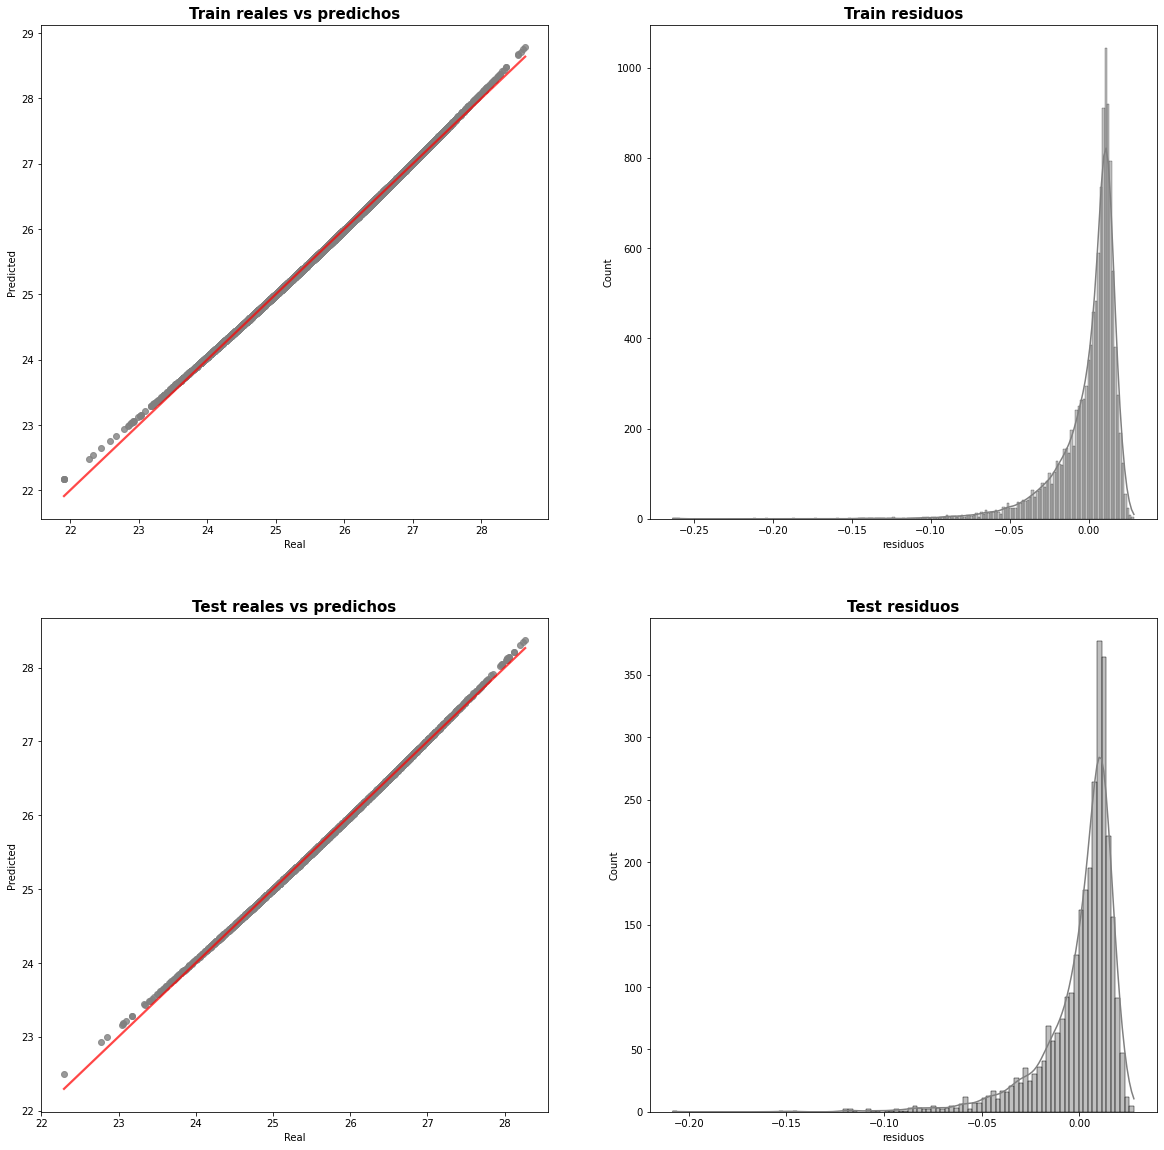

In [57]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

### Cross-Validation o Validación cruzada

In [61]:
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") 

/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your dat

Métricas validación cruzada: [-0.02089336 -0.0210322  -0.02244642 -0.01997221 -0.01902574 -0.02267925
 -0.02021408 -0.01844442 -0.01892658 -0.01946873]
Média métricas de validación cruzada: -0.0203102993282084


/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [59]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [20]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores


/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your dat

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.066489,0.027348,0.999460,-0.020893
1,0.061013,0.008318,0.999423,-0.021032
2,0.032291,0.008726,0.999374,-0.022446
3,0.026642,0.014971,0.999494,-0.019972
4,0.029577,0.009497,0.999511,-0.019026
5,0.048248,0.009204,0.999345,-0.022679
6,0.035752,0.009729,0.999480,-0.020214
7,0.027277,0.005027,0.999527,-0.018444
8,0.038776,0.013857,0.999506,-0.018927
9,0.035521,0.016780,0.999465,-0.019469


In [63]:
print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [29]:
cv_scores["test_r2"].mean()

0.9994587017509199

In [26]:
abs(cv_scores["test_neg_root_mean_squared_error"].mean())

0.020310299328208402